In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vetrirah/customer

100% 105k/105k [00:00<00:00, 375kB/s]
100% 105k/105k [00:00<00:00, 375kB/s]


In [ ]:
!unzip /content/customer.zip

Archive:  /content/customer.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [ ]:
df.shape

(8068, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
print(df['Gender'].value_counts())
print(df['Ever_Married'].value_counts())
print(df['Graduated'].value_counts())
print(df['Profession'].value_counts())
print(df['Spending_Score'].value_counts())
print(df['Var_1'].value_counts())

Male      4417
Female    3651
Name: Gender, dtype: int64
Yes    4643
No     3285
Name: Ever_Married, dtype: int64
Yes    4968
No     3022
Name: Graduated, dtype: int64
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [ ]:
def le(x):
  x=x.strip().upper()
  if x=='A':
    return int(0)
  elif x=='B':
    return int(1)
  elif x=='C':
    return int(2)
  elif x=='D':
    return int(3)
df['Segmentation']=df['Segmentation'].apply(le)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,0


In [ ]:
df1 = pd.get_dummies(df)
df1.loc[df.Ever_Married.isnull(), df1.columns.str.startswith("Ever_Married_")] = np.nan
df1.loc[df.Graduated.isnull(), df1.columns.str.startswith("Graduated")] = np.nan
df1.loc[df.Profession.isnull(), df1.columns.str.startswith("Profession")] = np.nan
df1.loc[df.Var_1.isnull(), df1.columns.str.startswith("Var_1")] = np.nan
df1.isnull().sum()

ID                            0
Age                           0
Work_Experience             829
Family_Size                 335
Segmentation                  0
Gender_Female                 0
Gender_Male                   0
Ever_Married_No             140
Ever_Married_Yes            140
Graduated_No                 78
Graduated_Yes                78
Profession_Artist           124
Profession_Doctor           124
Profession_Engineer         124
Profession_Entertainment    124
Profession_Executive        124
Profession_Healthcare       124
Profession_Homemaker        124
Profession_Lawyer           124
Profession_Marketing        124
Spending_Score_Average        0
Spending_Score_High           0
Spending_Score_Low            0
Var_1_Cat_1                  76
Var_1_Cat_2                  76
Var_1_Cat_3                  76
Var_1_Cat_4                  76
Var_1_Cat_5                  76
Var_1_Cat_6                  76
Var_1_Cat_7                  76
dtype: int64

In [ ]:
df1.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,22,1.0,4.0,3,0,1,1.0,0.0,1.0,...,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643,38,NaN,3.0,0,1,0,0.0,1.0,0.0,...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315,67,1.0,1.0,1,1,0,0.0,1.0,0.0,...,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735,67,0.0,2.0,1,0,1,0.0,1.0,0.0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669,40,NaN,6.0,0,1,0,0.0,1.0,0.0,...,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=1)
d=df.copy()
ia=imp.fit_transform(df1)
df2=pd.DataFrame(ia)
df2.columns=df1.columns

NameError: ignored

In [ ]:
df2.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809.0,22.0,1.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643.0,38.0,5.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315.0,67.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735.0,67.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669.0,40.0,2.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809.0,22.0,1.0,4.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,462643.0,38.0,5.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,466315.0,67.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,461735.0,67.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,462669.0,40.0,2.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

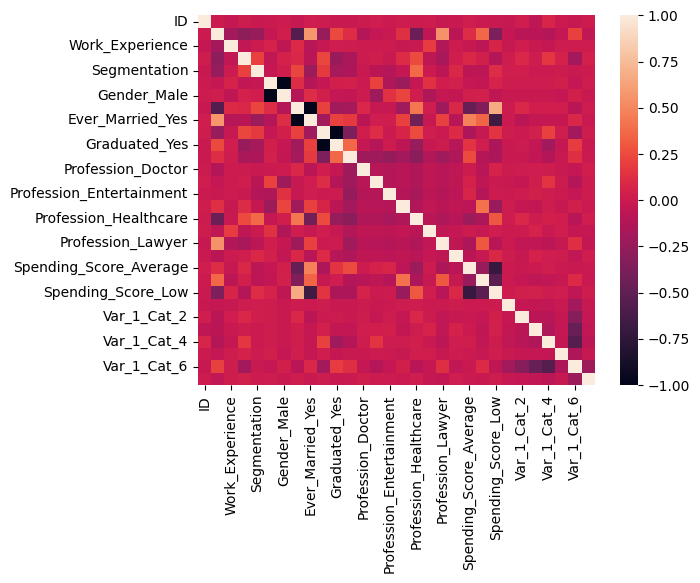

In [ ]:
sns.heatmap(df2.corr())

In [ ]:
df2=df2.drop(columns=['ID'])

In [ ]:
from sklearn.model_selection import train_test_split
x=df2.drop(columns=['Segmentation'])
y=df2.iloc[:,3]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)
y_train.head()

3461    2.0
7952    3.0
5210    2.0
5497    0.0
50      1.0
Name: Segmentation, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)
accuracy_score(y_pred,y_test)

0.4993804213135068

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_pred,y_test)


0.4653035935563817

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
accuracy_score(y_pred,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5154894671623296

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
accuracy_score(y_pred,y_test)

0.47335811648079307

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(learning_rate=0.1,n_jobs=-1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(x_train,y_train)
print(model_xgb.score(x_test,y_test))

0.48203221809169766


In [ ]:
Data_train=df.copy()

In [ ]:
for i in Data_train.columns:
  if sum(Data_train[i].isna())!=0:
    Data_train[i+"_add_val"]=Data_train[i].isna()
    if i!=["Age","Work_Experience","Family_Size"]:
      Data_train[i]=Data_train[i].fillna(Data_train[i].mode().values[0])
    else:
      Data_train[i]=Data_train[i].fillna(Data_train[i].mean())

In [ ]:
Data_train["Gender"]=pd.get_dummies(Data_train["Gender"],drop_first=True)
Data_train["Ever_Married"]=pd.get_dummies(Data_train["Ever_Married"],drop_first=True)
Data_train["Graduated"]=pd.get_dummies(Data_train["Graduated"],drop_first=True)
Data_train["Ever_Married_add_val"]=pd.get_dummies(Data_train["Ever_Married_add_val"],drop_first=True)
Data_train["Graduated_add_val"]=pd.get_dummies(Data_train["Graduated_add_val"],drop_first=True)
Data_train["Profession_add_val"]=pd.get_dummies(Data_train["Profession_add_val"],drop_first=True)
Data_train["Work_Experience_add_val"]=pd.get_dummies(Data_train["Work_Experience_add_val"],drop_first=True)
Data_train["Family_Size_add_val"]=pd.get_dummies(Data_train["Family_Size_add_val"],drop_first=True)
Data_train["Var_1_add_val"]=pd.get_dummies(Data_train["Var_1_add_val"],drop_first=True)

In [ ]:
Data_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Ever_Married_add_val,Graduated_add_val,Profession_add_val,Work_Experience_add_val,Family_Size_add_val,Var_1_add_val
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,0,0,0,0,0,0
1,462643,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A,0,0,0,1,0,0
2,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,0,0,0,0,0,0
3,461735,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,0,0,0,0,0,0
4,462669,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,A,0,0,0,1,0,0


In [ ]:
new_Data_train=pd.concat([Data_train,pd.get_dummies(Data_train["Profession"],drop_first=True),pd.get_dummies(Data_train["Spending_Score"],drop_first=True),pd.get_dummies(Data_train["Var_1"],drop_first=True)],axis=1)
new_Data_train=new_Data_train.drop(columns=["Profession","Spending_Score","Var_1"])
new_Data_train

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Ever_Married_add_val,Graduated_add_val,...,Lawyer,Marketing,High,Low,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,462809,1,0,22,0,1.0,4.0,D,0,0,...,0,0,0,1,0,0,1,0,0,0
1,462643,0,1,38,1,1.0,3.0,A,0,0,...,0,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,1,1.0,1.0,B,0,0,...,0,0,0,1,0,0,0,0,1,0
3,461735,1,1,67,1,0.0,2.0,B,0,0,...,1,0,1,0,0,0,0,0,1,0
4,462669,0,1,40,1,1.0,6.0,A,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0.0,7.0,D,0,0,...,0,0,0,1,0,0,0,0,0,0
8064,464685,1,0,35,0,3.0,4.0,D,0,0,...,0,0,0,1,0,0,1,0,0,0
8065,465406,0,0,33,1,1.0,1.0,D,0,0,...,0,0,0,1,0,0,0,0,1,0
8066,467299,0,0,27,1,1.0,4.0,B,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
x=new_Data_train.copy().drop(columns=['Segmentation'])
y=new_Data_train['Segmentation']
y=LabelEncoder().fit_transform(y)
map={3:"D",0:"A",1:"B",2:"C"}

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier(learning_rate=0.1,n_jobs=-1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(x_train,y_train)
print(model_xgb.score(x_test,y_test))

0.5105328376703842


In [ ]:
from lightgbm import LGBMClassifier
lgbcl = LGBMClassifier(n_estimators=60)
lgbcl= lgbcl.fit(x_train, y_train,eval_metric='multi_error',eval_set=(x_test , y_test),verbose=10)
y_predict = lgbcl.predict(x_test)
print(lgbcl.score(x_train , y_train))
print(lgbcl.score(x_test , y_test))

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's multi_error: 0.476456	valid_0's multi_logloss: 1.11346
[20]	valid_0's multi_error: 0.45539	valid_0's multi_logloss: 1.06043
[30]	valid_0's multi_error: 0.454771	valid_0's multi_logloss: 1.03862
[40]	valid_0's multi_error: 0.451053	valid_0's multi_logloss: 1.03063
[50]	valid_0's multi_error: 0.448575	valid_0's multi_logloss: 1.0285
[60]	valid_0's multi_error: 0.445477	valid_0's multi_logloss: 1.03134
0.7161450263402541
0.5545229244114003


In [ ]:
import matplotlib.pyplot as plt

In [1]:
feat_importances = pd.Series(lgbcl.feature_importances_, index=x_train.columns)
feat_importances.nlargest(30).plot(kind='barh')
# feat_importances.nsmallest(100).plot(kind='barh')
plt.show()

NameError: ignored